In [2]:
import pandas as pd



In [3]:
import openpyxl
print(openpyxl.__version__)


3.1.5


In [4]:
df = pd.read_excel("D:\\skill100\\data_wraggling\\Jumlah Faskes Jabar.xlsx")
df.head(3)


,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_faskes,jumlah_faskes,satuan
0,32,JAWA BARAT,3201,KABUPATEN BOGOR,RUMAH SAKIT UMUM,9,UNIT
1,32,JAWA BARAT,3201,KABUPATEN BOGOR,RUMAH SAKIT KHUSUS,0,UNIT
2,32,JAWA BARAT,3201,KABUPATEN BOGOR,RUMAH SAKIT BERSALIN,0,UNIT


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   kode_provinsi        270 non-null    int64 
 1   nama_provinsi        270 non-null    object
 2   kode_kabupaten_kota  270 non-null    int64 
 3   nama_kabupaten_kota  270 non-null    object
 4   jenis_faskes         270 non-null    object
 5   jumlah_faskes        270 non-null    int64 
 6   satuan               270 non-null    object
dtypes: int64(3), object(4)
memory usage: 14.9+ KB


In [6]:
df.isna().sum()

kode_provinsi          0
nama_provinsi          0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
jenis_faskes           0
jumlah_faskes          0
satuan                 0
dtype: int64

In [7]:
df.describe()

,kode_provinsi,kode_kabupaten_kota,jumlah_faskes
count,270.0,270.000000,270.000000
mean,32.0,3231.333333,206.185185
std,0.0,31.259794,697.236720
min,32.0,3201.000000,0.000000
25%,32.0,3207.000000,0.000000
50%,32.0,3214.000000,5.000000
75%,32.0,3273.000000,32.000000
max,32.0,3279.000000,4927.000000


In [8]:
filtered_data = df[df['jumlah_faskes'] == 4927]

filtered_data

,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_faskes,jumlah_faskes,satuan
4,32,JAWA BARAT,3201,KABUPATEN BOGOR,POSYANDU,4927,UNIT


In [9]:
import seaborn as sns

<Axes: xlabel='jumlah_faskes', ylabel='Count'>

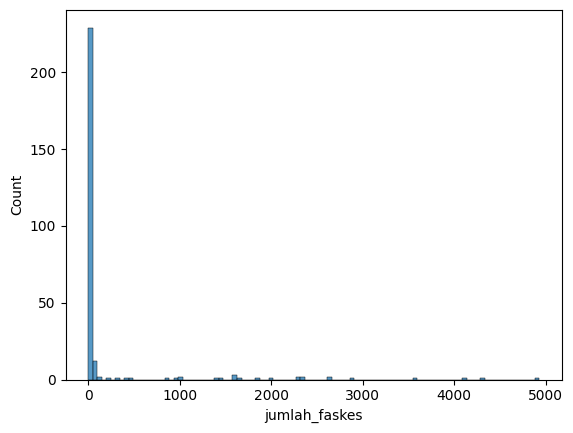

In [10]:
# Membuat histogram 
sns.histplot(data=df ,x= "jumlah_faskes", bins=100)

<Axes: xlabel='jumlah_faskes', ylabel='Count'>

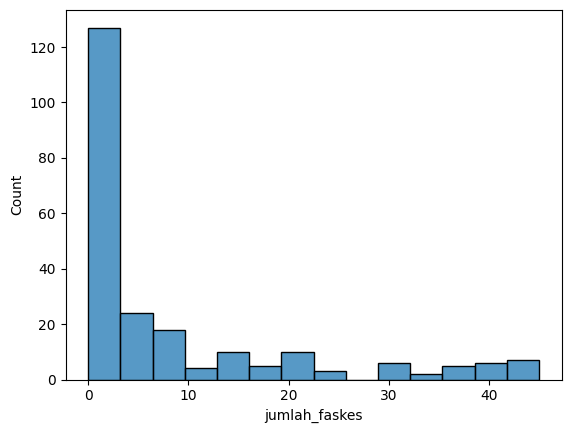

In [11]:
#batas atas data 
batas_atas = df['jumlah_faskes'].quantile(q=0.75)*1.5

#plot tampa outlier
faskes_tanpa_outlier = df[df['jumlah_faskes'] < batas_atas]

# plot tanpa extreme outlier
sns.histplot(faskes_tanpa_outlier['jumlah_faskes'])

In [18]:
faskes_tanpa_outlier.head(2)

,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_faskes,jumlah_faskes,satuan
0,32,JAWA BARAT,3201,KABUPATEN BOGOR,RUMAH SAKIT UMUM,9,UNIT
1,32,JAWA BARAT,3201,KABUPATEN BOGOR,RUMAH SAKIT KHUSUS,0,UNIT


In [75]:
print("Jumlah data duplikat:", faskes_tanpa_outlier.duplicated().sum())
df_cleaned = faskes_tanpa_outlier.drop_duplicates(keep='first')

Jumlah data duplikat: 32


In [79]:
df_cleaned.to_excel("data_jumlah_faskes_cleaned.xlsx", index=False)



In [100]:
jumlah_faskess = df_cleaned.groupby('nama_kabupaten_kota').agg({'jumlah_faskes': 'sum'})
jumlah_faskess.to_excel("jumlah_faskes_kesehatan.xlsx")

In [15]:
df2 = pd.read_excel('D:\\skill100\\data_wraggling\\Jaminan Kesehatan Jabar.xlsx')
df2.head()

,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jaminan_kesehatan,jumlah_penduduk,satuan
0,32,JAWA BARAT,3201,KABUPATEN BOGOR,PENERIMA BANTUAN IURAN (PBI) APBN,1119615,JIWA
1,32,JAWA BARAT,3201,KABUPATEN BOGOR,PENERIMA BANTUAN IURAN (PBI) APBD,546641,JIWA
2,32,JAWA BARAT,3201,KABUPATEN BOGOR,PEKERJA PENERIMA UPAH (PPU),792374,JIWA
3,32,JAWA BARAT,3201,KABUPATEN BOGOR,PEKERJA BUKAN PENERIMA UPAH (PBPU) / MANDIRI,999677,JIWA
4,32,JAWA BARAT,3201,KABUPATEN BOGOR,BUKAN PEKERJA (BP),58725,JIWA


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   kode_provinsi        216 non-null    int64 
 1   nama_provinsi        216 non-null    object
 2   kode_kabupaten_kota  216 non-null    int64 
 3   nama_kabupaten_kota  216 non-null    object
 4   jaminan_kesehatan    216 non-null    object
 5   jumlah_penduduk      216 non-null    int64 
 6   satuan               216 non-null    object
dtypes: int64(3), object(4)
memory usage: 11.9+ KB


In [17]:
df2.describe()

,kode_provinsi,kode_kabupaten_kota,jumlah_penduduk
count,216.0,216.000000,2.160000e+02
mean,32.0,3231.333333,1.640144e+05
std,0.0,31.274330,2.762955e+05
min,32.0,3201.000000,0.000000e+00
25%,32.0,3207.000000,0.000000e+00
50%,32.0,3214.000000,3.431100e+04
75%,32.0,3273.000000,1.864140e+05
max,32.0,3279.000000,1.316749e+06


In [80]:
print("Jumlah data duplikat:", df2.duplicated().sum())

Jumlah data duplikat: 0


In [21]:
df["nama_kabupaten_kota"].unique()

array(['KABUPATEN BOGOR', 'KABUPATEN SUKABUMI', 'KABUPATEN CIANJUR',
       'KABUPATEN BANDUNG', 'KABUPATEN GARUT', 'KABUPATEN TASIKMALAYA',
       'KABUPATEN CIAMIS', 'KABUPATEN KUNINGAN', 'KABUPATEN CIREBON',
       'KABUPATEN MAJALENGKA', 'KABUPATEN SUMEDANG',
       'KABUPATEN INDRAMAYU', 'KABUPATEN SUBANG', 'KABUPATEN PURWAKARTA',
       'KABUPATEN KARAWANG', 'KABUPATEN BEKASI',
       'KABUPATEN BANDUNG BARAT', 'KABUPATEN PANGANDARAN', 'KOTA BOGOR',
       'KOTA SUKABUMI', 'KOTA BANDUNG', 'KOTA CIREBON', 'KOTA BEKASI',
       'KOTA DEPOK', 'KOTA CIMAHI', 'KOTA TASIKMALAYA', 'KOTA BANJAR'],
      dtype=object)

In [24]:
df2['jaminan_kesehatan'].unique()

array(['PENERIMA BANTUAN IURAN (PBI) APBN',
       'PENERIMA BANTUAN IURAN (PBI) APBD', 'PEKERJA PENERIMA UPAH (PPU)',
       'PEKERJA BUKAN PENERIMA UPAH (PBPU) / MANDIRI',
       'BUKAN PEKERJA (BP)', 'JAMKESDA', 'ASURANSI SWASTA',
       'ASURANSI PERUSAHAAN'], dtype=object)

In [25]:
df['jenis_faskes'].unique()

array(['RUMAH SAKIT UMUM', 'RUMAH SAKIT KHUSUS', 'RUMAH SAKIT BERSALIN',
       'PUSKESMAS', 'POSYANDU'], dtype=object)

In [83]:
jaminan = df2.groupby(['jaminan_kesehatan','nama_kabupaten_kota'])
data_jaminan = jaminan.agg({'jumlah_penduduk':'sum'})
data_jaminan.to_excel('jaminan_kesehatan.xlsx')

In [84]:
df_merged = pd.merge(df_cleaned, df2, on='nama_kabupaten_kota', how='inner')


In [91]:
df_merged.to_excel('jaminan_kesehatan_jumlahfaskes.xlsx')

In [90]:
df_grouped = df_merged.groupby(['nama_kabupaten_kota','jaminan_kesehatan']).agg({
    'jumlah_penduduk': 'sum'
}).reset_index()
df_grouped

,nama_kabupaten_kota,jaminan_kesehatan,jumlah_penduduk
0,KABUPATEN BANDUNG,ASURANSI PERUSAHAAN,0
1,KABUPATEN BANDUNG,ASURANSI SWASTA,0
2,KABUPATEN BANDUNG,BUKAN PEKERJA (BP),477743
3,KABUPATEN BANDUNG,JAMKESDA,1904
4,KABUPATEN BANDUNG,PEKERJA BUKAN PENERIMA UPAH (PBPU) / MANDIRI,2576035
...,...,...,...
211,KOTA TASIKMALAYA,JAMKESDA,0
212,KOTA TASIKMALAYA,PEKERJA BUKAN PENERIMA UPAH (PBPU) / MANDIRI,447320
213,KOTA TASIKMALAYA,PEKERJA PENERIMA UPAH (PPU),986096
214,KOTA TASIKMALAYA,PENERIMA BANTUAN IURAN (PBI) APBD,451408
